# Purchase Prediction

#### Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
# We can override the default matplotlib styles with those of Seaborn
sns.set()## Importing the relevant libraries

#### Load the data

In [157]:
raw_data = pd.read_csv(os.path.join(os.path.pardir,'data','processed','BlackFriday.csv'))

In [121]:
df = raw_data.copy()

In [5]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [6]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577,537577,537577,537577.00000,537577,537577,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
unique,NaN,3623,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1858,405380,214690,NaN,226493,189192,NaN,NaN,NaN,NaN,NaN
mean,1.002992e+06,NaN,NaN,NaN,8.08271,NaN,NaN,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,NaN,NaN,NaN,6.52412,NaN,NaN,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,NaN,NaN,NaN,0.00000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,NaN,NaN,NaN,2.00000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,NaN,NaN,NaN,7.00000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,NaN,NaN,NaN,14.00000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12073.000000


In [7]:
df.head(100)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [8]:
df.notnull().count()

User_ID                       537577
Product_ID                    537577
Gender                        537577
Age                           537577
Occupation                    537577
City_Category                 537577
Stay_In_Current_City_Years    537577
Marital_Status                537577
Product_Category_1            537577
Product_Category_2            537577
Product_Category_3            537577
Purchase                      537577
dtype: int64

In [9]:
df['Product_Category_2'].isna().value_counts()

False    370591
True     166986
Name: Product_Category_2, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [11]:
# Getting missing values for each column

df.isnull().sum(axis=0)


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

#### Dealing with Missing values

**Option1** - **Since the df is so large. I will go ahead and drop the rows with missing values**

In [122]:
df = df.dropna()

In [80]:
df.isnull().sum(axis=0)

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [13]:
# from impyute.imputation.cs import mice
# import sys
# sys.setrecursionlimit(100000)

In [14]:
# df[['Product_Category_2', 'Product_Category_3']].shape

In [15]:
# start the MICE training
# imputed_training=mice(df[['Product_Category_2', 'Product_Category_3']].values)

In [16]:
#Impute the values using scikit-learn SimpleImpute Class
# from sklearn.impute import SimpleImputer

In [17]:
# imp_mean = SimpleImputer( strategy='median') #for median imputation replace 'mean' with 'median'
# imp_mean.fit(df[['Product_Category_2', 'Product_Category_3']])
# imputed_df = imp_mean.transform(df[['Product_Category_2', 'Product_Category_3']])

In [18]:
# imputed_df

In [19]:
# # Convert it to a panddas dataframe
# imputed_df = pd.DataFrame(data=imputed_df, columns=['Product_Category_2', 'Product_Category_3'])
# imputed_df

In [20]:
# Drop the original 'Product_Category_2', 'Product_Category_3' columns
# df = df.drop(['Product_Category_2', 'Product_Category_3'], axis=1)

In [21]:
# # concatenate it with df
# df = pd.concat([df, imputed_df], axis=1)
# df

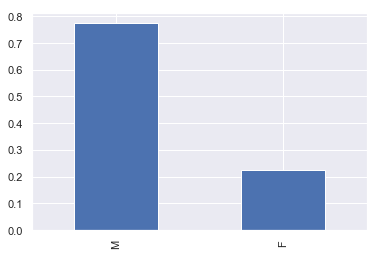

In [22]:
df['Gender'].value_counts(normalize=True).plot(kind='bar');

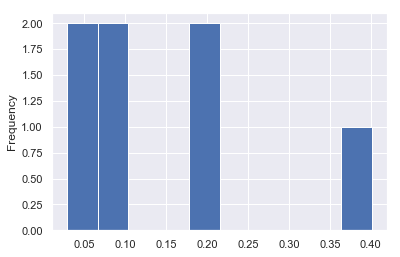

In [23]:
df['Age'].value_counts(normalize=True).plot(kind='hist');

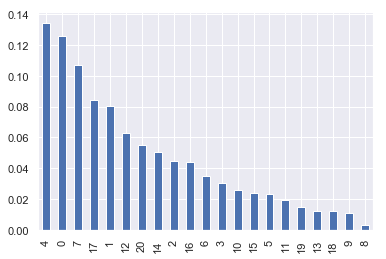

In [24]:
df['Occupation'].value_counts(normalize=True).plot(kind='bar');

### Distribution

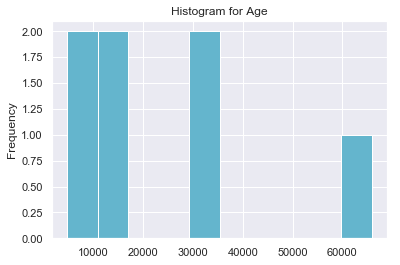

In [25]:
# use hist to create a histogram
df['Age'].value_counts().plot(kind='hist', title='Histogram for Age', color='c');

In [26]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055
18,1000007,P00036842,M,36-45,1,B,1,1,1,14.0,16.0,11788
19,1000008,P00249542,M,26-35,12,C,4+,1,1,5.0,15.0,19614
24,1000008,P00303442,M,26-35,12,C,4+,1,1,8.0,14.0,11927
28,1000009,P00078742,M,26-35,17,C,0,0,5,8.0,14.0,5391
29,1000010,P00085942,F,36-45,1,B,4+,1,2,4.0,8.0,16352


### drop the User_Id and Product_Id columns

In [123]:
df = df.drop(['User_ID', 'Product_ID'], axis=1)
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055
18,M,36-45,1,B,1,1,1,14.0,16.0,11788
19,M,26-35,12,C,4+,1,1,5.0,15.0,19614
24,M,26-35,12,C,4+,1,1,8.0,14.0,11927
28,M,26-35,17,C,0,0,5,8.0,14.0,5391
29,F,36-45,1,B,4+,1,2,4.0,8.0,16352


In [28]:
df['Occupation'].value_counts()

4     22076
0     20677
7     17542
17    13844
1     13209
12    10304
20     9080
14     8258
2      7391
16     7194
6      5706
3      4973
10     4268
15     3911
5      3840
11     3234
19     2397
13     2025
18     1968
9      1842
8       539
Name: Occupation, dtype: int64

### Create dummy variables

In [93]:
# Function to create the dummy variables
def create_dummies(df, feature_label):
    dummies = pd.get_dummies(df[feature_label], prefix=feature_label, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop([feature_label], axis=1)
    return df

In [124]:
# Gender
df_with_dummies = create_dummies(df, 'Gender')
# df_with_dummies

In [125]:
# City_Category
df_with_dummies = create_dummies(df_with_dummies, 'City_Category')
# df_with_dummies

In [126]:
# Stay_In_Current_City_Years
df_with_dummies = create_dummies(df_with_dummies, 'Stay_In_Current_City_Years')
# df_with_dummies

In [127]:
# Age
df_with_dummies = create_dummies(df_with_dummies, 'Age')
# df_with_dummies

In [98]:
# Occupation
df_with_dummies = create_dummies(df_with_dummies, 'Occupation')
# df_with_dummies

In [128]:
df_with_dummies

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
1,10,0,1,6.0,14.0,15200,0,0,0,0,1,0,0,0,0,0,0,0,0
6,7,1,1,8.0,17.0,19215,1,1,0,0,1,0,0,0,0,0,1,0,0
13,20,1,1,2.0,5.0,15665,1,0,0,1,0,0,0,0,1,0,0,0,0
14,9,0,5,8.0,14.0,5378,0,0,0,1,0,0,0,0,0,0,0,1,0
16,9,0,2,3.0,4.0,13055,0,0,0,1,0,0,0,0,0,0,0,1,0
18,1,1,1,14.0,16.0,11788,1,1,0,1,0,0,0,0,0,1,0,0,0
19,12,1,1,5.0,15.0,19614,1,0,1,0,0,0,1,0,1,0,0,0,0
24,12,1,1,8.0,14.0,11927,1,0,1,0,0,0,1,0,1,0,0,0,0
28,17,0,5,8.0,14.0,5391,1,0,1,0,0,0,0,0,1,0,0,0,0
29,1,1,2,4.0,8.0,16352,0,1,0,0,0,0,1,0,0,1,0,0,0


In [129]:
# Reordder the columns
columns_to_reorder = df_with_dummies.columns.values
columns_to_reorder

array(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Gender_M',
       'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+'], dtype=object)

In [132]:
columns_to_reorder = ['Gender_M', 'Age_18-25', 'Age_26-35','Age_36-45', 'Age_46-50', 'Age_51-55',
                       'Age_55+','Marital_Status', 'Occupation', 'City_Category_B',
                      'City_Category_C', 'Stay_In_Current_City_Years_1',
                      'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
                      'Stay_In_Current_City_Years_4+','Product_Category_1',
                       'Product_Category_2', 'Product_Category_3','Purchase']

In [102]:
pd.set_option('display.max_columns', 500)

In [133]:
df_with_dummies = df_with_dummies[columns_to_reorder]
df_with_dummies

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Marital_Status,Occupation,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,0,0,0,0,0,0,0,0,10,0,0,0,1,0,0,1,6.0,14.0,15200
6,1,0,0,0,1,0,0,1,7,1,0,0,1,0,0,1,8.0,17.0,19215
13,1,0,1,0,0,0,0,1,20,0,0,1,0,0,0,1,2.0,5.0,15665
14,0,0,0,0,0,1,0,0,9,0,0,1,0,0,0,5,8.0,14.0,5378
16,0,0,0,0,0,1,0,0,9,0,0,1,0,0,0,2,3.0,4.0,13055
18,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,14.0,16.0,11788
19,1,0,1,0,0,0,0,1,12,0,1,0,0,0,1,1,5.0,15.0,19614
24,1,0,1,0,0,0,0,1,12,0,1,0,0,0,1,1,8.0,14.0,11927
28,1,0,1,0,0,0,0,0,17,0,1,0,0,0,0,5,8.0,14.0,5391
29,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,2,4.0,8.0,16352


#### Scale the inputs

## NOTE: 
***
Since the dummy variables are either in 0s or 1s, we do not have to include them when standardizing. Hence we have to create a custom scalar

The idea is that this is a custom scalar based on the `StandardScalar` from sklearn.

However when we declare the scalar object there's an extra argument, `columns to scale`.

So our custom scalar will not standardise all inputs but only the ones we choose.

In this way we will be able to preserve the dummys untouched.

In practice we would avoid this step by standardizing prior to creating the dummies but we didn't do

In [104]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScalar(BaseEstimator, TransformerMixin):
    def __init__(self, columns, copy=True, with_mean=True, with_std=True):
        self.scalar = StandardScaler(copy, with_mean, with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None

    def fit(self, X, y=None):
        self.scalar.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scalar.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:, ~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]
        

##### Select the inputs and targets

In [134]:
df_with_dummies = df_with_dummies.iloc[:20000, :]

In [135]:
targets = df_with_dummies['Purchase']
unscalled_inputs = df_with_dummies.drop(['Purchase'], axis=1)

In [136]:
unscalled_inputs

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Marital_Status,Occupation,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Product_Category_1,Product_Category_2,Product_Category_3
1,0,0,0,0,0,0,0,0,10,0,0,0,1,0,0,1,6.0,14.0
6,1,0,0,0,1,0,0,1,7,1,0,0,1,0,0,1,8.0,17.0
13,1,0,1,0,0,0,0,1,20,0,0,1,0,0,0,1,2.0,5.0
14,0,0,0,0,0,1,0,0,9,0,0,1,0,0,0,5,8.0,14.0
16,0,0,0,0,0,1,0,0,9,0,0,1,0,0,0,2,3.0,4.0
18,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,14.0,16.0
19,1,0,1,0,0,0,0,1,12,0,1,0,0,0,1,1,5.0,15.0
24,1,0,1,0,0,0,0,1,12,0,1,0,0,0,1,1,8.0,14.0
28,1,0,1,0,0,0,0,0,17,0,1,0,0,0,0,5,8.0,14.0
29,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,2,4.0,8.0


In [108]:
unscalled_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 65870
Data columns (total 37 columns):
Gender_M                         20000 non-null uint8
Age_18-25                        20000 non-null uint8
Age_26-35                        20000 non-null uint8
Age_36-45                        20000 non-null uint8
Age_46-50                        20000 non-null uint8
Age_51-55                        20000 non-null uint8
Age_55+                          20000 non-null uint8
Marital_Status                   20000 non-null int64
City_Category_B                  20000 non-null uint8
City_Category_C                  20000 non-null uint8
Stay_In_Current_City_Years_1     20000 non-null uint8
Stay_In_Current_City_Years_2     20000 non-null uint8
Stay_In_Current_City_Years_3     20000 non-null uint8
Stay_In_Current_City_Years_4+    20000 non-null uint8
Occupation_1                     20000 non-null uint8
Occupation_2                     20000 non-null uint8
Occupation_3               

In [56]:
unscalled_inputs.columns.values

array(['Gender_M', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50',
       'Age_51-55', 'Age_55+', 'Marital_Status', 'City_Category_B',
       'City_Category_C', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+', 'Occupation_1', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'Occupation_5', 'Occupation_6',
       'Occupation_7', 'Occupation_8', 'Occupation_9', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_20', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'], dtype=object)

In [137]:
columns_to_scale = ['Product_Category_1','Product_Category_2', 'Product_Category_3']

In [159]:
scalar = CustomScalar(columns_to_scale)
scalar

CustomScalar(columns=['Product_Category_1', 'Product_Category_2',
                      'Product_Category_3'],
             copy=None, with_mean=None, with_std=None)

In [165]:
# purchase_scalar will contain information about the mean and standard deviation.
scalar.fit(unscalled_inputs.iloc[:2, :][columns_to_scale])

CustomScalar(columns=['Product_Category_1', 'Product_Category_2',
                      'Product_Category_3'],
             copy=None, with_mean=None, with_std=None)

In [164]:
unscalled_inputs.iloc[:2,:]

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Marital_Status,Occupation,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Product_Category_1,Product_Category_2,Product_Category_3
1,0,0,0,0,0,0,0,0,10,0,0,0,1,0,0,1,6.0,14.0
6,1,0,0,0,1,0,0,1,7,1,0,0,1,0,0,1,8.0,17.0


In [166]:
product_scaled_inputs = scalar.transform(unscalled_inputs.iloc[:2, :][columns_to_scale])
product_scaled_inputs

,Product_Category_1,Product_Category_2,Product_Category_3
0,0.0,-1.0,-1.0
1,0.0,1.0,1.0
6,NaN,NaN,NaN


In [168]:
unscalled_inputs

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Marital_Status,Occupation,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Product_Category_1,Product_Category_2,Product_Category_3
1,0,0,0,0,0,0,0,0,10,0,0,0,1,0,0,1,6.0,14.0
6,1,0,0,0,1,0,0,1,7,1,0,0,1,0,0,1,8.0,17.0
13,1,0,1,0,0,0,0,1,20,0,0,1,0,0,0,1,2.0,5.0
14,0,0,0,0,0,1,0,0,9,0,0,1,0,0,0,5,8.0,14.0
16,0,0,0,0,0,1,0,0,9,0,0,1,0,0,0,2,3.0,4.0
18,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,14.0,16.0
19,1,0,1,0,0,0,0,1,12,0,1,0,0,0,1,1,5.0,15.0
24,1,0,1,0,0,0,0,1,12,0,1,0,0,0,1,1,8.0,14.0
28,1,0,1,0,0,0,0,0,17,0,1,0,0,0,0,5,8.0,14.0
29,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,2,4.0,8.0


In [169]:
other_columns = unscalled_inputs.drop(columns_to_scale, axis=1)
other_columns

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Marital_Status,Occupation,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
1,0,0,0,0,0,0,0,0,10,0,0,0,1,0,0
6,1,0,0,0,1,0,0,1,7,1,0,0,1,0,0
13,1,0,1,0,0,0,0,1,20,0,0,1,0,0,0
14,0,0,0,0,0,1,0,0,9,0,0,1,0,0,0
16,0,0,0,0,0,1,0,0,9,0,0,1,0,0,0
18,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0
19,1,0,1,0,0,0,0,1,12,0,1,0,0,0,1
24,1,0,1,0,0,0,0,1,12,0,1,0,0,0,1
28,1,0,1,0,0,0,0,0,17,0,1,0,0,0,0
29,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1


In [171]:
pd.concat([other_columns.iloc[:2, :], product_scaled_inputs], axis=1)

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Marital_Status,Occupation,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Product_Category_1,Product_Category_2,Product_Category_3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,7.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN


In [112]:
# unscalled_inputs[columns_to_scale]

In [175]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(unscalled_inputs.iloc[:2,:][columns_to_scale])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [176]:
unscalled_inputs.iloc[:2,:][columns_to_scale]

,Product_Category_1,Product_Category_2,Product_Category_3
1,1,6.0,14.0
6,1,8.0,17.0


In [179]:
product_scaled_inputs = scalar.transform(unscalled_inputs.iloc[:2,:][columns_to_scale])

In [140]:
# product_scaled_inputs = scalar.transform(unscalled_inputs[columns_to_scale])

In [180]:
# product_scaled_inputs

array([[ 0., -1., -1.],
       [ 0.,  1.,  1.]])

In [181]:
product_scaled_inputs = pd.DataFrame(data=product_scaled_inputs, columns=columns_to_scale)
product_scaled_inputs

,Product_Category_1,Product_Category_2,Product_Category_3
0,0.0,-1.0,-1.0
1,0.0,1.0,1.0


In [183]:
un_ = unscalled_inputs.iloc[0:2, :].drop(columns_to_scale,axis=1)
un_

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Marital_Status,Occupation,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
1,0,0,0,0,0,0,0,0,10,0,0,0,1,0,0
6,1,0,0,0,1,0,0,1,7,1,0,0,1,0,0


In [184]:
pd.concat([un_, product_scaled_inputs], axis=1)

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Marital_Status,Occupation,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Product_Category_1,Product_Category_2,Product_Category_3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,7.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN


In [49]:
# unscalled_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164278 entries, 1 to 537573
Data columns (total 37 columns):
Gender_M                         164278 non-null uint8
Age_18-25                        164278 non-null uint8
Age_26-35                        164278 non-null uint8
Age_36-45                        164278 non-null uint8
Age_46-50                        164278 non-null uint8
Age_51-55                        164278 non-null uint8
Age_55+                          164278 non-null uint8
Marital_Status                   164278 non-null int64
City_Category_B                  164278 non-null uint8
City_Category_C                  164278 non-null uint8
Stay_In_Current_City_Years_1     164278 non-null uint8
Stay_In_Current_City_Years_2     164278 non-null uint8
Stay_In_Current_City_Years_3     164278 non-null uint8
Stay_In_Current_City_Years_4+    164278 non-null uint8
Occupation_1                     164278 non-null uint8
Occupation_2                     164278 non-null uint8
Occupatio

In [50]:
# type(unscalled_inputs)

pandas.core.frame.DataFrame

In [51]:
# type(product_scaled_inputs)

pandas.core.frame.DataFrame

In [149]:
unscalled_inputs.iloc[0:2, :]

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Marital_Status,Occupation,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Product_Category_1,Product_Category_2,Product_Category_3
1,0,0,0,0,0,0,0,0,10,0,0,0,1,0,0,1,6.0,14.0
6,1,0,0,0,1,0,0,1,7,1,0,0,1,0,0,1,8.0,17.0


In [150]:
un_ = unscalled_inputs.iloc[0:2, :].drop(columns_to_scale,axis=1)

In [151]:
un_

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Marital_Status,Occupation,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
1,0,0,0,0,0,0,0,0,10,0,0,0,1,0,0
6,1,0,0,0,1,0,0,1,7,1,0,0,1,0,0


In [152]:
p_ = product_scaled_inputs.iloc[:2, :]
p_

,Product_Category_1,Product_Category_2,Product_Category_3
0,-0.67792,-0.208539,0.314071
1,-0.67792,0.234477,1.043988


In [154]:
pd.concat([un_, p_], axis=1).dropna()

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Marital_Status,Occupation,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Product_Category_1,Product_Category_2,Product_Category_3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.67792,0.234477,1.043988


In [53]:
unscalled_inputs = pd.concat([unscalled_inputs.drop(columns_to_scale,axis=1), product_scaled_inputs], axis=1)

In [54]:
unscalled_inputs

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Marital_Status,City_Category_B,City_Category_C,...,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Product_Category_1,Product_Category_2,Product_Category_3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.676709,-0.199151,0.322515
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.676709,0.245266,1.049907
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.676709,-1.087985,-1.859658
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.877387,0.245266,0.322515
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.288185,-0.865777,-2.102122
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.676709,1.578516,0.807443
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.676709,-0.421360,0.564979
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.676709,0.245266,0.322515
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.877387,0.245266,0.322515
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.288185,-0.643568,-1.132267


### Train Test Split

We want to shuffle the data so that we remove all types of dependencies that come from the order of
the data set like Day of the week

In [55]:
# import the relevant library
from sklearn.model_selection import train_test_split

In [106]:
# train_test_split(inputs, target) will split the data into 4 arrays
# array 1: A training dataset with inputs
# array 2: A training dataset with targets
# array 3: A testing dataset with inputs
# array 4: A testing dataset with targets

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365

x_train, x_test, y_train, y_test = train_test_split(unscalled_inputs, targets, test_size=0.2, random_state=365)

In [107]:
print('\n x_train: ',x_train.shape, '\n x_test: ',
      x_test.shape, '\n y_train:', y_train.shape, '\n y_test: ',y_test.shape)


 x_train:  (131422, 37) 
 x_test:  (32856, 37) 
 y_train: (131422,) 
 y_test:  (32856,)


##### Logistic regression with sklearn

In [108]:
# Import the relevant libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [109]:
reg = LogisticRegression(solver='liblinear')

In [ ]:
# Train the model
reg.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


###### accuracy

In [ ]:
# To get the model accuracy we use .score(inputs, targets)
reg.score(x_train, y_train)
# Our model has an accuracy of around 76%

In [17]:
int(df.shape[0]*.7)

114994

In [18]:
df.shape[0]

164278

In [ ]:
test_d, df_new2 = df[:50000, :], df[100000:, :] if len(df) > 10 else df, None
